##
    PassengerId : 각 승객의 고유 번호
    Survived : 생존 여부(종속 변수)
    0 = 사망
    1 = 생존
    Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
    1st = Upper
    2nd = Middle
    3rd = Lower
    Name : 이름
    Sex : 성별
    Age : 나이
    SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
    Parch : 동반한 Parent(부모) Child(자식)의 수
    Ticket : 티켓의 고유넘버
    Fare : 티켓의 요금
    Cabin : 객실 번호
    Embarked : 승선한 항
    C = Cherbourg
    Q = Queenstown
    S = Southampton
##

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [7]:
gender_submission = pd.read_csv('gender_submission.csv')
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

gender_submission = gender_submission.set_index('PassengerId')
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')



In [65]:
gender_submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [8]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [64]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 데이터 결측 

In [9]:
train_null_val = train.isnull().sum()
train_null_val_per = (100*train_null_val)/len(train)
df_train_null = pd.concat([train_null_val,train_null_val_per],axis = 1)
df_train_null.columns = ['count','per']
df_train_null

,count,per
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,687,77.104377


In [43]:
gender_submission_null_val = gender_submission.isnull().sum()
gender_submission_null_val_per = (100*gender_submission_null_val)/len(gender_submission)
df_gender_submission_null = pd.concat([gender_submission_null_val,gender_submission_null_val_per],axis = 1)
df_gender_submission_null.columns = ['count','per']
df_gender_submission_null

,count,per
Survived,0,0.0


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

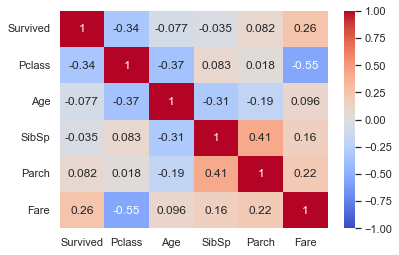

In [47]:
print(train.corr())
plt.rc('font', size = 12)
sns.heatmap(train.corr(), vmin = -1, vmax = 1 , annot = True, cmap = 'coolwarm'  )

Text(0, 0.5, 'Count')

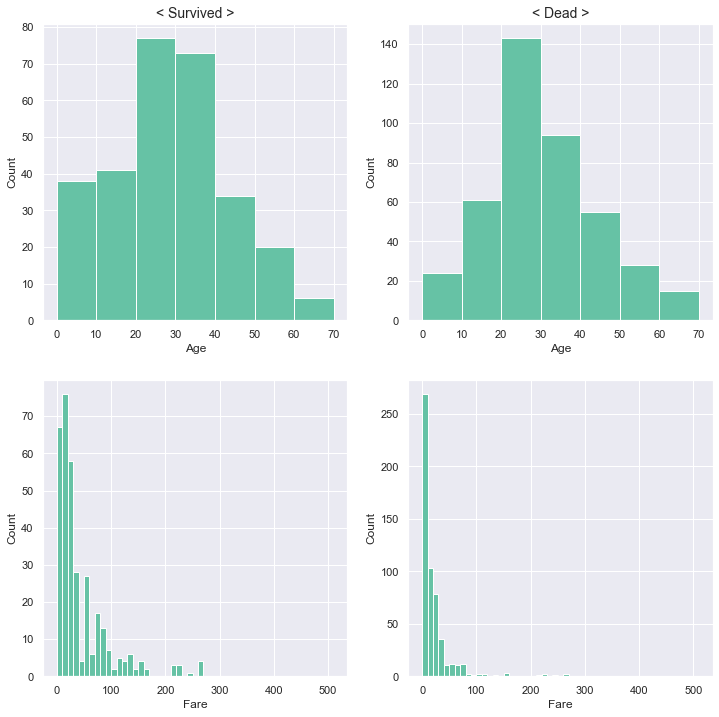

In [67]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)

plt.hist(train[train['Survived'] == 1]['Age'], bins = range(0,80,10) )
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('< Survived >', fontsize = 14)

plt.subplot(2,2,2)
plt.hist(train[train['Survived'] == 0]['Age'], bins = range(0,80,10) )
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('< Dead >',fontsize = 14)

plt.subplot(2,2,3)
plt.hist(train[train['Survived'] == 1]['Fare'], bins = range(0,520,10))
plt.xlabel('Fare')
plt.ylabel('Count')
# plt.title('< Survived >', fontsize = 14)

plt.subplot(2,2,4)
plt.hist(train[train['Survived'] == 0]['Fare'], bins = range(0,520,10))
plt.xlabel('Fare')
plt.ylabel('Count')
# plt.title('< Dead >',fontsize = 14)

In [62]:
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True)

681

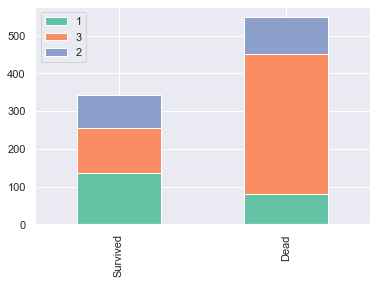

In [63]:

hart(train,'Pclass')

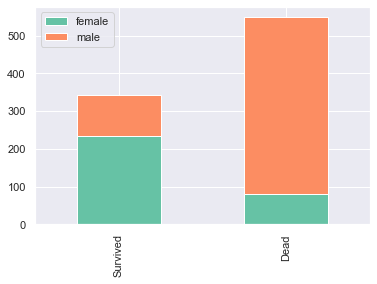

In [16]:
chart(train,'Sex')

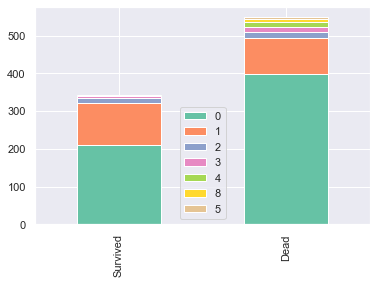

In [17]:
chart(train,'SibSp')

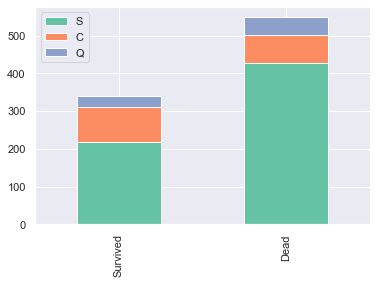

In [18]:
chart(train,'Embarked')

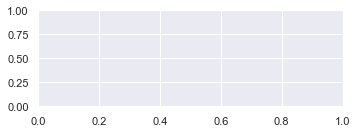

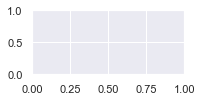

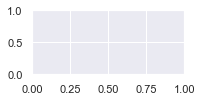

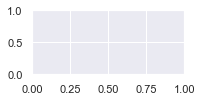

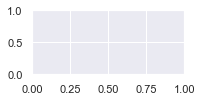

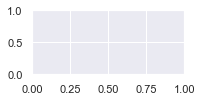

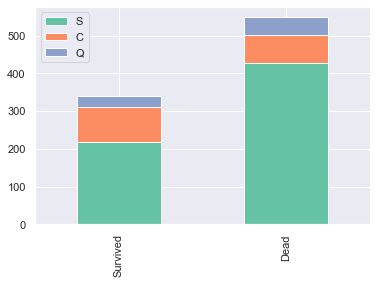

In [75]:
plt.figure(figsize=(12,6))

plt.subplot(3,2,1)
chart(train,'Pclass')

plt.subplot(3,2,2)
chart(train,'Sex')

plt.subplot(3,2,3)
chart(train,'SibSp')

plt.subplot(3,2,4)
chart(train,'Parch')

plt.subplot(3,2,5)
chart(train,'Pclass')

plt.subplot(3,2,6)
chart(train,'Embarked')



In [98]:
f_name_list = []
title_list = []
l_name_list  = []

for name in train['Name']:
    f_name, other = name.split(',')
    f_name_list.append(f_name)

    title  = other.split('.')[0]
    l_name = other.split('.')[-1]
    title_list.append(title)
    l_name_list.append(l_name)

new_train = train
new_train['F_name'] = f_name_list
new_train['Title'] = title_list
new_train['L_name'] = l_name_list 
    

In [99]:
new_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,F_name,Title,L_name
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie"""


In [87]:
f_name

'Braund'